Needs to be implemented:

* baseline
* -toyplot-text-anchor-shift
* vertically center on first line of text?

In [6]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [7]:
#text = "<span>This is <i>italic</i>, <b>bold</b>,<br/><code>monospace</code>, <small>small</small>,<br/><sup>superscript</sup> and <sub>subscript</sub> text<br/>for your amusement!</span>"
text = "Hello"
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

In [8]:
toyplot.text.dump(layout, size=False, style=True)

toyplot.text.Layout
    size: 36.448 x 19.2
  toyplot.text.LineBox
    location: -18.224, -9.6
    size: 36.448 x 19.2
    toyplot.text.TextBox
      location: -18.224, -9.6
      size: 36.448 x 19.2
      text: 'Hello'
      style:
        font-size: 16.0
        vertical-align: baseline
        font-family: helvetica
        line-height: 19.2


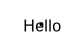

In [9]:
def draw(box, image):
#    if isinstance(box, toyplot.text.LineBox):
#        xml.SubElement(
#            image,
#            "rect",
#            x=str(box.left),
#            y=str(box.top),
#            width=str(box.width),
#            height=str(box.height),
#            fill="ivory",
#            stroke="lightgray",
#        )
        
    if isinstance(box, toyplot.text.TextBox):
#        xml.SubElement(
#            image,
#            "rect",
#            x=str(box.left),
#            y=str(box.top),
#            width=str(box.width),
#            height=str(box.height),
#            fill="none",
#            stroke="lightgray",
#        )
        
        baseline_offset = box.baseline
        
#        xml.SubElement(
#            image,
#            "line",
#            x1=str(box.left),
#            y1=str(box.bottom - baseline_offset),
#            x2=str(box.right),
#            y2=str(box.bottom - baseline_offset),
#            stroke="gray")
        
        style = toyplot.style.combine(
            box.style,
            {"white-space":"pre"},
        )
       
#        print "%r %r" % (box, box.style)
    
        xml.SubElement(
            image,
            "text",
            x=str(box.left),
            y=str(box.bottom - baseline_offset),
            fill="black",
            stroke="none",
            style=toyplot.style.to_css(style),
        ).text = box.text
        
    for child in box.children:
        draw(child, image)

image = xml.Element(
    "svg",
    width=str(int(layout.width*2 + 10)),
    height=str(int(layout.height*2 + 10)),
    style="border: 1px solid #f0f0f0",
)
group = xml.SubElement(
    image,
    "g",
    transform="translate(%s %s)" % (layout.width + 5, layout.height + 5),
)
xml.SubElement(
    group,
    "circle",
    cx="0",
    cy="0",
    r="2",
    fill="black",
    stroke="none",
)
draw(layout, group)
IPython.display.SVG(xml.tostring(image))

In [10]:
IPython.display.HTML("<span style='text-anchor: middle; font-family: helvetica; font-size: 16px'>%s</span>" % text)